In [61]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyodbc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

In [62]:
conn = pyodbc.connect('Driver={SQL Server};Server=LAPTOP-78J09PRS\SQLEXPRESS;Database=Restaurant_rating;Trusted_Connection=yes;')

In [63]:
userprof_df = pd.read_sql("SELECT up.*, uc.Rcuisine as cuisine FROM users.userProfile as up join users.userCuisine as uc on up.userID = uc.userID", conn)
# userrating_df = pd.read_sql("SELECT up")

### Our first step involves analyzing the customer dataset and their preferences

In [64]:
userprof_df = userprof_df.drop(['latitude','longitude'], axis =1)#dropping unnecessary columns

In [65]:
userprof_df

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,cuisine
0,U1001,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,American
1,U1002,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,Mexican
2,U1003,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,Mexican
3,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Bakery
4,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Breakfast-Brunch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Southern
326,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Dessert-Ice_Cream
327,U1136,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60,Mexican
328,U1137,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78,Mexican


In [66]:
userprof_df.info()#checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            330 non-null    object 
 1   smoker            330 non-null    object 
 2   drink_level       330 non-null    object 
 3   dress_preference  330 non-null    object 
 4   ambience          330 non-null    object 
 5   transport         330 non-null    object 
 6   marital_status    330 non-null    object 
 7   hijos             330 non-null    object 
 8   birth_year        330 non-null    int64  
 9   interest          330 non-null    object 
 10  personality       330 non-null    object 
 11  religion          330 non-null    object 
 12  activity          330 non-null    object 
 13  color             330 non-null    object 
 14  weight            330 non-null    int64  
 15  budget            330 non-null    object 
 16  height            330 non-null    float64
 1

In [67]:
smokedf = userprof_df[userprof_df['smoker']!= '?']
smokedf = smokedf[smokedf['ambience']!= '?']
smokedf['smoker'].replace('false','Non-Smoker', inplace = True)
smokedf['smoker'].replace('true','Smoker', inplace = True)


Text(0.5, 1.0, 'Percentage of Customers who smoke ')

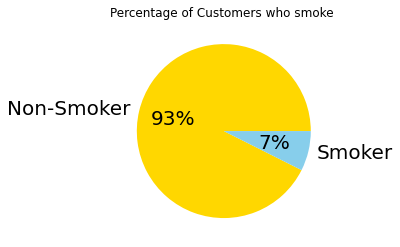

In [68]:
smokedf.groupby('smoker').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},
                                  colors=['gold', 'skyblue', 'red', 'green'])
plt.ylabel('')
plt.title('Percentage of Customers who smoke ')

Text(0.5, 1.0, 'Drinking Preference of Customer ')

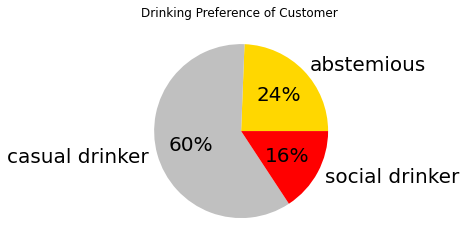

In [69]:
smokedf.groupby('drink_level').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},
                                  colors=['gold', 'silver', 'red', 'green'])
plt.ylabel('')
plt.title('Drinking Preference of Customer ')

Text(0.5, 1.0, 'Ambience preference  ')

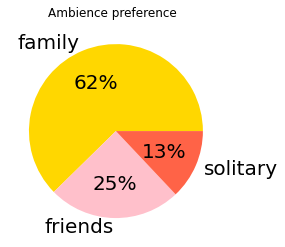

In [70]:
smokedf.groupby('ambience').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},
                                  colors=['gold','pink', 'tomato'])
plt.ylabel('')
plt.title('Ambience preference  ')

In [71]:
userprof_df['cuisine'].value_counts()[:15]

Mexican             97
American            11
Cafeteria            9
Pizzeria             9
Cafe-Coffee_Shop     8
Family               8
Japanese             7
Italian              7
Burgers              6
Chinese              6
Hot_Dogs             6
Latin_American       6
Contemporary         5
Regional             5
Fast_Food            5
Name: cuisine, dtype: int64

### Mexican is the most popular cuisine, let's see how the other cuisines rank among consumers

Text(0, 0.5, 'Count of Users')

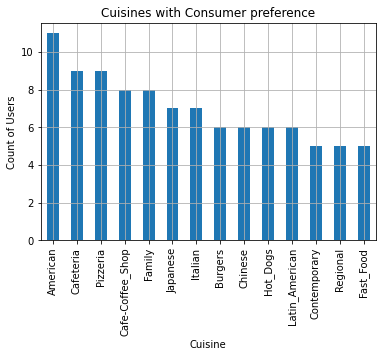

In [72]:
userprof_df['cuisine'].value_counts()[1:15].plot(kind = 'bar')
plt.grid()
plt.title('Cuisines with Consumer preference')
plt.xlabel('Cuisine')
plt.ylabel('Count of Users')

In [73]:
budget_df = userprof_df [userprof_df['budget'] != '?']# dropping rows with no value

In [74]:
budget_df

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,cuisine
0,U1001,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,American
1,U1002,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,Mexican
2,U1003,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,Mexican
3,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Bakery
4,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Breakfast-Brunch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Southern
326,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Dessert-Ice_Cream
327,U1136,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60,Mexican
328,U1137,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78,Mexican


### Let's see the budget of our consumer base

Text(3.674999999999997, 0.5, 'Count of Customers')

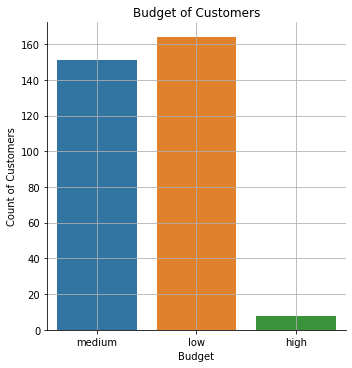

In [75]:
plot = sns.catplot(data= budget_df, kind = 'count', x = 'budget')
plt.grid()
plt.title('Budget of Customers')
plt.xlabel('Budget')
plt.ylabel('Count of Customers')

## We have most and almost equal amount of medium and low Budget Customers, with very few high budget customers.

### Let's analyze Budget vs Cuisine.

In [76]:
sub_df = budget_df[budget_df.groupby('cuisine').cuisine.transform('count')>5].copy() 

In [77]:
sub_df

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,cuisine
0,U1001,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,American
1,U1002,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,Mexican
2,U1003,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,Mexican
5,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Japanese
7,U1004,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Mexican
315,U1135,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54,Italian
327,U1136,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60,Mexican
328,U1137,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78,Mexican


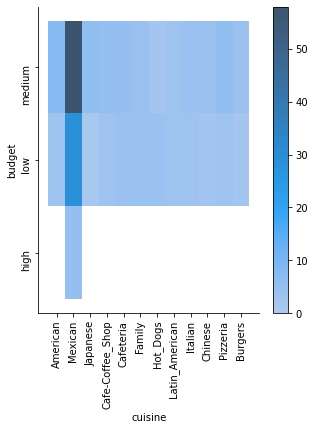

In [78]:
plot = sns.displot(sub_df, x="cuisine", y="budget", cbar = True)
plot.ax.tick_params(labelrotation = 90)

### Mexican seems to be the most go to cuisine for people regardless of their budget, but what other cuisine is popular among other budgets.

In [79]:
sub_df2 = sub_df[sub_df['cuisine']!= 'Mexican']

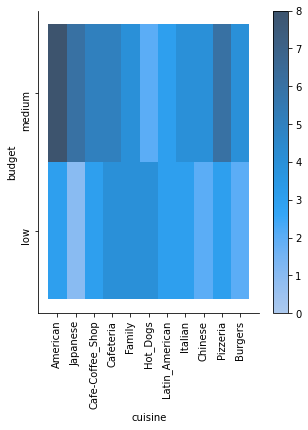

In [80]:
plot = sns.displot(sub_df2, x="cuisine", y="budget", cbar = True)
plot.ax.tick_params(labelrotation = 90)

#### For medium budget customers, American cuisine, followed by Pizzeria restaurantsand Japanese restaurants seems to be most popular.

#### For low budget customers, however, Cafeteria, Hot Dog stands are more popular. 

### We've analyzed our customer dataset, using this analysis we can build an app using the restaurant data of the same area and recommend restaurants according to user preference and rating of that place

 Since multiple users have posted multiple reviews for the places, we have a problem of associating one place with a single review.
 
 To solve this problem we will drop the userID column and just use the aggregate of rating columns with placeID as index

In [81]:
ratingdf = pd.read_sql("SELECT placeID,  AVG(Cast(rating as Float)) as Rating, AVG(Cast(food_rating as Float)) as food_rating, AVG(Cast(service_rating as Float)) as service_rating FROM users.rating GROUP BY placeID", conn)
rest = pd.read_sql(" SELECT placeID, name, address, city, state, alcohol, smoking_area, dress_code, accessibility, price, area, other_services from restaurant.restaurants", conn)

In [82]:
ratingdf

,placeID,Rating,food_rating,service_rating
0,135034,2.000000,2.000000,1.600000
1,135082,0.777778,0.777778,0.666667
2,135011,1.333333,1.333333,1.333333
3,132921,1.235294,1.117647,0.882353
4,135028,1.533333,1.400000,1.266667
...,...,...,...,...
125,134976,1.750000,1.750000,1.000000
126,132723,1.416667,1.333333,1.250000
127,135019,1.333333,1.500000,0.833333
128,135050,1.250000,1.250000,1.000000


In [83]:
#we've got unique rows with their ratings now, we merge this with our restaurant dataframe

In [84]:
rest

,placeID,name,address,city,state,alcohol,smoking_area,dress_code,accessibility,price,area,other_services
0,132560,puesto de gorditas,frente al tecnologico,victoria,tamaulipas,No_Alcohol_Served,permitted,informal,no_accessibility,low,open,none
1,132561,cafe ambar,?,?,?,No_Alcohol_Served,none,informal,completely,low,closed,none
2,132564,churchs,?,?,?,No_Alcohol_Served,none,informal,completely,low,closed,none
3,132572,Cafe Chaires,?,San Luis Potosi,San Luis Potosi,No_Alcohol_Served,not permitted,informal,completely,low,closed,none
4,132583,McDonalds Centro,Rayon sn col. Centro,Cuernavaca,Morelos,No_Alcohol_Served,not permitted,informal,partially,low,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...
125,135088,Cafeteria cenidet,Interior Internado Palmira SN,Cuernavaca,Morelos,No_Alcohol_Served,not permitted,informal,no_accessibility,low,closed,none
126,135104,vips,?,?,?,Full_Bar,not permitted,informal,completely,medium,closed,variety
127,135106,El Rinc?n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,open,none
128,135108,Potzocalli,Carretera Central Sn,San Luis Potosi,?,No_Alcohol_Served,none,informal,completely,low,closed,none


In [85]:
restdf = pd.merge(rest, ratingdf, how = 'left')

In [86]:
restdf

,placeID,name,address,city,state,alcohol,smoking_area,dress_code,accessibility,price,area,other_services,Rating,food_rating,service_rating
0,132560,puesto de gorditas,frente al tecnologico,victoria,tamaulipas,No_Alcohol_Served,permitted,informal,no_accessibility,low,open,none,0.500000,1.000000,0.250000
1,132561,cafe ambar,?,?,?,No_Alcohol_Served,none,informal,completely,low,closed,none,0.750000,1.000000,1.000000
2,132564,churchs,?,?,?,No_Alcohol_Served,none,informal,completely,low,closed,none,1.250000,1.250000,1.500000
3,132572,Cafe Chaires,?,San Luis Potosi,San Luis Potosi,No_Alcohol_Served,not permitted,informal,completely,low,closed,none,1.000000,1.000000,0.933333
4,132583,McDonalds Centro,Rayon sn col. Centro,Cuernavaca,Morelos,No_Alcohol_Served,not permitted,informal,partially,low,closed,none,1.000000,1.000000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,135088,Cafeteria cenidet,Interior Internado Palmira SN,Cuernavaca,Morelos,No_Alcohol_Served,not permitted,informal,no_accessibility,low,closed,none,1.000000,1.166667,1.000000
126,135104,vips,?,?,?,Full_Bar,not permitted,informal,completely,medium,closed,variety,0.857143,1.428571,0.857143
127,135106,El Rinc?n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Wine-Beer,only at bar,informal,partially,medium,open,none,1.200000,1.200000,1.200000
128,135108,Potzocalli,Carretera Central Sn,San Luis Potosi,?,No_Alcohol_Served,none,informal,completely,low,closed,none,1.181818,1.181818,1.000000


### For our analysis, let's assume a customer, Julio. He does not smoke and is a social drinker with low budget to spend. Our app would recommend the following places to him.


In [87]:
restdf['smoking_area'].unique()

array(['permitted', 'none', 'not permitted', 'section', 'only at bar'],
      dtype=object)

In [97]:
restsmoke = restdf [((restdf['smoking_area'] == 'none') | (restdf['smoking_area'] =='not permitted')) & (restdf['price'] == 'low') & (restdf['alcohol'] != 'No_Alcohol_Served')]
query1 = """SELECT res.name, AVG(rating.rating) rating FROM restaurant.restaurants res
JOIN users.rating rating ON rating.placeID = res.placeID
WHERE (smoking_area = 'none' OR smoking_area = 'not permitted')
AND price = 'low'
AND alcohol != 'No_Alcohol_Served'
GROUP BY res.name
ORDER BY AVG(rating.rating) DESC"""
restsmoke = pd.read_sql(query1, conn)

In [98]:
restsmoke

,name,rating
0,emilianos,2.000000
1,Unicols Pizza,0.857143
2,Abondance Restaurante Bar,0.500000


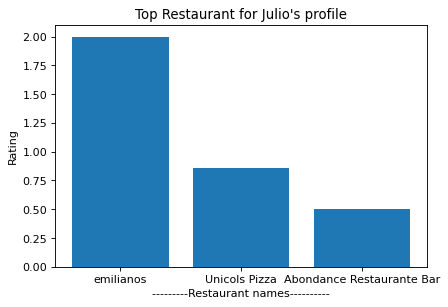

In [101]:
#restsmoke = restsmoke.sort_values(by = 'Rating', ascending = False).head(5)
figure(figsize=(6, 4), dpi=80)
plt.bar(x = restsmoke.name, height = restsmoke.rating)
plt.title('Top Restaurant for Julio\'s profile')
plt.xlabel('---------Restaurant names----------')
plt.ylabel('Rating')
plt.show()


### Julio wants to see places with the best food rating and does not care whether they serve alcohol or price

In [102]:
restsmoke = restdf [((restdf['smoking_area'] == 'none') | (restdf['smoking_area'] =='not permitted'))]
query2= """SELECT TOP 3 res.name, AVG(rating.food_rating) rating FROM restaurant.restaurants res
JOIN users.rating rating ON rating.placeID = res.placeID
WHERE (smoking_area = 'none' OR smoking_area = 'not permitted')
GROUP BY res.name
ORDER BY AVG(rating.food_rating) DESC"""
restsmoke = pd.read_sql(query2, conn)

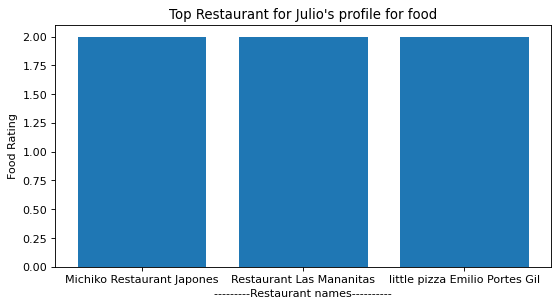

In [105]:
figure(figsize=(8, 4), dpi=80)
plt.bar(x = restsmoke.name, height = restsmoke.rating)
plt.title('Top Restaurant for Julio\'s profile for food')
plt.xlabel('---------Restaurant names----------')
plt.ylabel('Food Rating')
plt.show()

### Let's assume Julio wants to host a party for his office employees at an ambience with a formal setting.

In [106]:
# restformal = restdf[(restdf['dress_code'] == 'formal')]
query3 = """SELECT TOP 3 res.name, AVG(rating.rating) rating FROM restaurant.restaurants res
JOIN users.rating rating ON rating.placeID = res.placeID
AND res.dress_code = 'formal'
GROUP BY res.name
ORDER BY AVG(rating.rating) DESC"""
restformal = pd.read_sql(query3 , conn)

In [107]:
restformal

,name,rating
0,Restaurant Las Mananitas,2.000000
1,cafe punta del cielo,1.833333


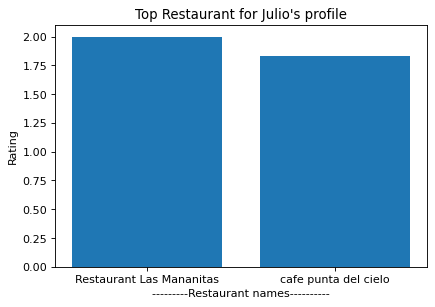

In [109]:
figure(figsize=(6,4), dpi=80)
plt.bar(x = restformal.name, height = restformal.rating)
plt.title('Top Restaurant for Julio\'s profile')
plt.xlabel('---------Restaurant names----------')
plt.ylabel('Rating')
plt.show()


## Conclusion

We can use our database to analyze the customer database to find the type of customers in the area and their preferences and then can create an app to recommend restaurants in the area according to their specific profile and preferences with the respective rating.

This system is beneficial to the target users and market where options are limitless and customers want to find their preferred restaurant in an time efficient manner.